In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data Preparation

In [ ]:
#  load the data
churn = pd.read_csv('/content/drive/MyDrive/DATA_3105/churn.csv',sep=' ')

churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   COLLEGE                      20000 non-null  object
 1   INCOME                       20000 non-null  int64 
 2   OVERAGE                      20000 non-null  int64 
 3   LEFTOVER                     20000 non-null  int64 
 4   HOUSE                        20000 non-null  int64 
 5   HANDSET_PRICE                20000 non-null  int64 
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 7   AVERAGE_CALL_DURATION        20000 non-null  int64 
 8   REPORTED_SATISFACTION        20000 non-null  object
 9   REPORTED_USAGE_LEVEL         20000 non-null  object
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 11  LEAVE                        20000 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


In [ ]:
# Convert COLLEGE as numeric
churn.loc[churn['COLLEGE']=='zero','COLLEGE'] = 0  
churn.loc[churn['COLLEGE']=='one','COLLEGE'] = 1

# Drop 4 categorical variables for simplicity 
churn.drop(["OVER_15MINS_CALLS_PER_MONTH", "REPORTED_SATISFACTION", 
            "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"], axis=1, inplace=True)

churn.dtypes  

COLLEGE                  object
INCOME                    int64
OVERAGE                   int64
LEFTOVER                  int64
HOUSE                     int64
HANDSET_PRICE             int64
AVERAGE_CALL_DURATION     int64
LEAVE                    object
dtype: object

**Split and Scale Data**

In [ ]:
X = churn.drop('LEAVE', axis=1)

y = churn['LEAVE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16000, 7)

(4000, 7)

(16000,)

(4000,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   
X_test_scaled  = scaler.transform(X_test)

# 2. Modeling

## 2.1 Dummy Classifier

Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) of the ``sklearn.dummy.DummyClassifier``.

- ``strategy``:  {“most_frequent”, “prior”, “stratified”, “uniform”, “constant”}, default=”prior”

**Majority Classifier**

In [ ]:
# STAY is the majority class in training data (50.58%)

y_train.value_counts()

STAY     8093
LEAVE    7907
Name: LEAVE, dtype: int64

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, y_train)

dummy_pred1 = dummy_majority.predict(X_test_scaled)

dummy_prob1 = dummy_majority.predict_proba(X_test_scaled)

display(sum(dummy_pred1 == 'LEAVE'), dummy_pred1, dummy_prob1)   # all predicted as "STAY"

0

array(['STAY', 'STAY', 'STAY', ..., 'STAY', 'STAY', 'STAY'], dtype='<U4')

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

**Random Classifier**

In [ ]:
dummy_random = DummyClassifier(strategy = 'uniform', random_state = 0).fit(X_train_scaled, y_train)

dummy_pred2 = dummy_random.predict(X_test_scaled)

dummy_prob2 = dummy_random.predict_proba(X_test_scaled)

display(sum(dummy_pred2 == 'LEAVE'), dummy_pred2, dummy_prob2)   # each class has the same probability

1960

array(['LEAVE', 'STAY', 'STAY', ..., 'STAY', 'LEAVE', 'LEAVE'],
      dtype=object)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       ...,
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

## 2.2 Train three classification models


Let's train three models and use their default threshold (0.5) for prediction and evaluation.

- Logistic Regression
- Linear SVC
- Decision Tree

**Logistic Regression**

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

lr.score(X_test_scaled, y_test)  # accuracy score

0.642

**SVM**

here we use ``LinearSVC`` as ``SVC`` takes a longer training time with a large dataset.

In [ ]:
svm = LinearSVC()

svm.fit(X_train_scaled,y_train)      

#svm = SVC(kernel = 'linear').fit(X_train,y_train)   

svm.score(X_test_scaled,y_test)    

0.6425

**Decision Tree**

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,  min_samples_leaf = 500)      

tree.fit(X_train_scaled, y_train)

tree.score(X_test_scaled,y_test) 

0.7085

# 3. Confusion Matrix 

Use the [``confusion_matrix`` function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from ``sklearn.metrics`` module to plot the confusion matrix for each model -- note here the rows and columns are opposite to the order displayed in lecture notes/textbook.

- ``normalize``: {‘true’, ‘pred’, ‘all’}, default=None

**Logistic Regression**

In [ ]:
# get predicted value first
lr_pred = lr.predict(X_test_scaled)  

# The confusion matrix is a numpy array: rows means true labels; cols means predicted labels 
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test, y_pred = lr_pred)    

array([[1225,  720],
       [ 712, 1343]])

Alternatively, Use [the ``plot_confusion_matrix``](https://scikit-plot.readthedocs.io/en/stable/metrics.html) from the ``scikit-plot`` package (You may need to install the package first). 

```python
>>>pip install scikit-plot
```

You may also normalize the frequencies as percentage of total true (row sum) by setting ``normalize`` = True. 

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


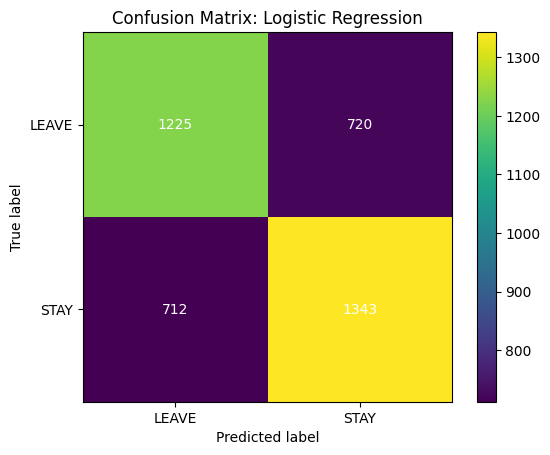

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_true = y_test, 
                      y_pred = lr_pred, 
                      cmap = 'viridis',    # Choose a prefered color map
                      title = 'Confusion Matrix: Logistic Regression'); 

Now please use ``svm`` and ``tree`` model to make predictions on test data, and check the confusion matrix of each result. 

- Can you try to normalize the frequency over the total number of the cases in each actual class(i.e., the row sum)? 

<font color=red>***Exercise 1: Your Codes Here***</font>  

**Linear SVC**

In [ ]:
SVC_pred = svm.predict(X_test_scaled)  

# The confusion matrix is a numpy array: rows means true labels; cols means predicted labels 
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test, y_pred = SVC_pred) 

array([[1220,  725],
       [ 705, 1350]])

<Axes: title={'center': 'Confusion Matrix: Logistic Regression'}, xlabel='Predicted label', ylabel='True label'>

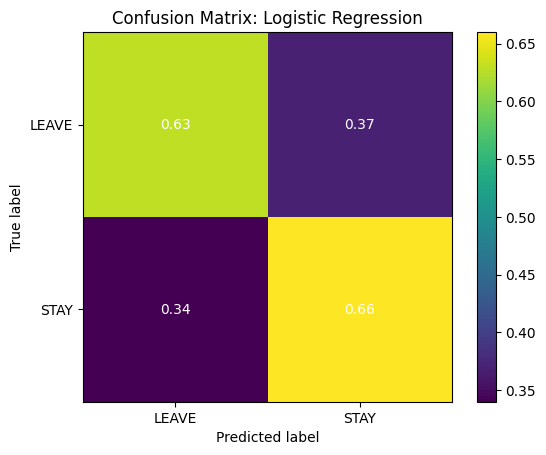

In [ ]:
plot_confusion_matrix(y_true = y_test, 
          y_pred = SVC_pred, 
          cmap = 'viridis',  
          normalize = 'True',
          title = 'Confusion Matrix: Logistic Regression')

**Decision Tree**

<Axes: title={'center': 'Confusion Matrix: Logistic Regression'}, xlabel='Predicted label', ylabel='True label'>

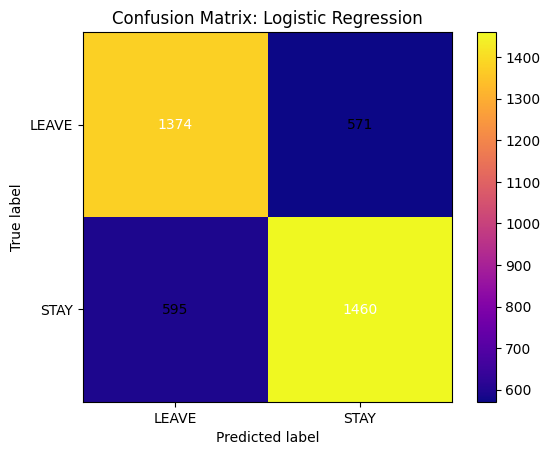

In [ ]:
tree_pred = tree.predict(X_test_scaled)
plot_confusion_matrix(y_true = y_test, 
          y_pred = tree_pred, 
          cmap = 'plasma',  
          title = 'Confusion Matrix: Logistic Regression')

# 4. Evaluation Metrics

In binary classification: 
- ``Accuracy`` = TP + TN / (TP + TN + FP + FN), check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- ``Sensitivity (Recall)`` = TP / (TP + FN), Also known as True Positive Rate. Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- ``Precision`` = TP / (TP + FP), check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- ``F1`` = 2 * Precision * Recall / (Precision + Recall). Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)



## 4.1 Manual calculation 

Can you manually compute the ``Accuracy``, ``Recall``, ``Precision``, and ``F1`` score for the logistic regression model (i.e., the ``lr``) training in section 3? 

*Hints: you may identify the number of TP, FP, TN, FN from the consufion matrix first.*

<font color=red>***Exercise 2: Your Codes Here***</font>  

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
print('\nConfusion Matrix:')
print('TN=',tn, 'FP=', fp, 'FN=', fn, 'TP=', tp)
print('Recall/Sensitivity= ',round(tp/(tp+fn),3))
print('Specificity= ', round(tn/(tn+fp),3))
print('Precision= ', round(tp/(tp+fp),3))


Confusion Matrix:
TN= 1225 FP= 720 FN= 712 TP= 1343
Recall/Sensitivity=  0.654
Specificity=  0.63
Precision=  0.651


## 4.2 Functions from  ``sklearn.metrics``


Note two important parameters in [``Sensitivity/Recall`` score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [``Precision`` score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) and [``F1`` score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) metrics:

1. ``pos_label``:  The class to report if ``average='binary'`` and data is binary (str or int, ``default``= 1). If labels are not either {-1, 1} or {0, 1}, then the ``pos_label`` should be explicitly given (e.g., "LEAVE").     

>- If the data are multiclass this will be ignored; 

2. ``average`` : {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, ``default='binary'``.  

>- ``'binary'``: the default value.  This report results for the class specified by ``pos_label``. Only applicable if the target variable are binary.


>For multi-class data, we may need to specify the type of averaging with below options:

>- ``'macro'``: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account and will weight each class equally. For example, in a binary-class problem, ``macro_recall`` = (TP/(TP+FN) + TN/(TN+FP))/2; ``macro_precision`` = (TP/(TP+FP) + TN/(TN+FN))/2).

>- ``'micro'``: Calculate metrics globally and weigh each instance equally. In two-class problem, ``micro_recall`` = (TP+TN)/(TP+FP+TN+FN); ``micro_precision`` = (TP+TN)/(TP+FP+TN+FN)). 

>- ``None``: the scores for each class are returned.

``sklearn`` doesn't compute ``specificity``  as it can be simply derived if  ``pos_label`` = "STAY" (i.e., negative class).  

**Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy(LR): {:.2f}'.format(accuracy_score(y_test, lr_pred)))   # same as lr.score(X_test_scaled, y_test) 
print('Recall(LR): {:.2f}'.format(recall_score(y_test, lr_pred, pos_label = 'LEAVE')))     # specify positive label 
print('Precision(LR): {:.2f}'.format(precision_score(y_test, lr_pred, pos_label = 'LEAVE')))
print('F1(LR): {:.2f}'.format(f1_score(y_test, lr_pred, pos_label = 'LEAVE')))

Accuracy(LR): 0.64
Recall(LR): 0.63
Precision(LR): 0.63
F1(LR): 0.63


Now please compute the accuracy, recall, precision and f1 score for both Linear SVC and Tree model trained above. You may need to get the predicted class labels first. 

<font color=red>***Exercise 3: Your Codes Here***</font>  

**Linear SVC**

In [ ]:
print('Accuracy(SVC): {:.2f}'.format(accuracy_score(y_test, SVC_pred)))   # same as lr.score(X_test_scaled, y_test) 
print('Recall(SVC): {:.2f}'.format(recall_score(y_test, SVC_pred, pos_label = 'LEAVE')))     # specify positive label 
print('Precision(SVC): {:.2f}'.format(precision_score(y_test, SVC_pred, pos_label = 'LEAVE')))
print('F1(SVC): {:.2f}'.format(f1_score(y_test, SVC_pred, pos_label = 'LEAVE')))

Accuracy(SVC): 0.64
Recall(SVC): 0.63
Precision(SVC): 0.63
F1(SVC): 0.63


**Decision Tree**

In [ ]:
print('Accuracy(tree): {:.2f}'.format(accuracy_score(y_test, SVC_pred)))   # same as lr.score(X_test_scaled, y_test) 
print('Recall(tree): {:.2f}'.format(recall_score(y_test, tree_pred, pos_label = 'LEAVE')))     # specify positive label 
print('Precision(tree): {:.2f}'.format(precision_score(y_test, tree_pred, pos_label = 'LEAVE')))
print('F1(tree): {:.2f}'.format(f1_score(y_test, tree_pred, pos_label = 'LEAVE')))

Accuracy(tree): 0.64
Recall(tree): 0.71
Precision(tree): 0.70
F1(tree): 0.70


In [1]:
import numpy as np
np.set_printoptions(precision=1)
print(np.random.rand(1,20)*100)


[[ 7.3 79.2 37.5 41.7 29.2 86.2  8.8  2.4 43.7 89.6 58.6 95.9 87.7  9.3
  71.9 20.1 42.3 59.3 73.5 20.3]]
